# NFL Betting
---

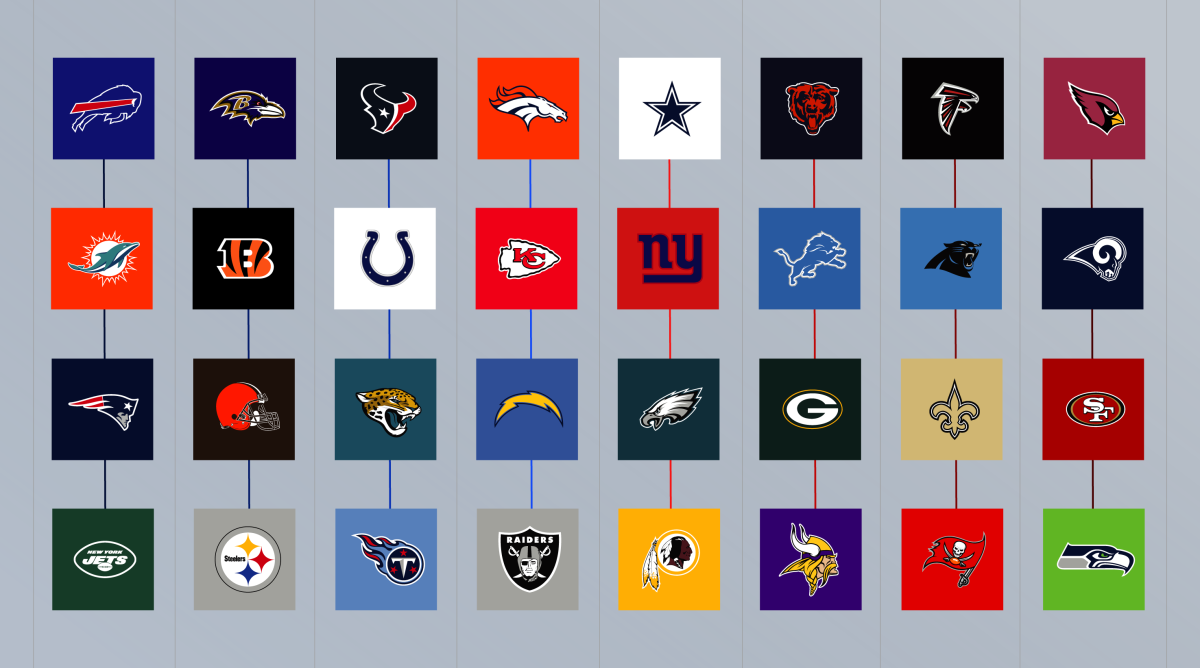

---
# Overview

This project involved creating a model that can predict if the favored team will win their NFL game. The Calm Before the Score was founded to help degenrate NFL gamblers make an educated decision each weekend. Padawan John, an NFL gambler, has contacted us to help him generate more money by creating a model to predict the winner. In order to create a model we used a data frame from kaggle which included information from every NFL game from 1966 to 2022. We narrowed down the data frame, and analyzed over 9,000 games. We looked into their spreads, favored team, score, and weather. Aftewards, we created a couple of predictive models, and chose the best one, an XG Boost model. Which provided us with an accuracy score of 80%, which mean't the favored team was more likey to win, but not always. 

---

# Business Problem 

We were hired by an NFL gambling addict, Padawan John.  He wants us to create a model that well help predict if the favored NFL team will win their game that week. Which at the end, will generate him more money. 

---

# Imports and Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('../data/spreadspoke_scores.csv')

---

# Data Exploration 

- Explore null values 
- See the type of column

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

---

# Data Cleaning 

- Focus on data from the year 1985 to 2022
- Dropped Superbowl from `schedule_week` since scores were empty 
- Dropped PICK from `team_favorite_id` since it didn't have a favorite to win 

In [ ]:
df = df.loc[(df['schedule_season'] >= 1985) & (df['schedule_week'] != 'Superbowl')]
df = df.loc[df['team_favorite_id'] != 'PICK']
df

To make the data more accessible, we coverted the names in `team_home` and `team_away` to the team's abbreviation rather then their full name

In [ ]:
home_teams = list(df['team_home'].values)

In [ ]:
home_team_ab = []
for team in home_teams:
    if team.__contains__('Cardinals'):
        home_team_ab.append('ARI')
    elif team.__contains__('Falcons'):
        home_team_ab.append('ATL')
    elif team.__contains__('Ravens'):
        home_team_ab.append('BAL')
    elif team.__contains__('Bills'):
        home_team_ab.append('BUF')
    elif team.__contains__('Panthers'):
        home_team_ab.append('CAR')
    elif team.__contains__('Bears'):
        home_team_ab.append('CHI')
    elif team.__contains__('Bengals'):
        home_team_ab.append('CIN')
    elif team.__contains__('Browns'):
        home_team_ab.append('CLE')
    elif team.__contains__('Cowboys'):
        home_team_ab.append('DAL')
    elif team.__contains__('Broncos'):
        home_team_ab.append('DEN')
    elif team.__contains__('Lions'):
        home_team_ab.append('DET')
    elif team.__contains__('Packers'):
        home_team_ab.append('GB')
    elif team.__contains__('Texans'):
        home_team_ab.append('HOU')
    elif team.__contains__('Colts'):
        home_team_ab.append('IND')
    elif team.__contains__('Jaguars'):
        home_team_ab.append('JAX')
    elif team.__contains__('Chiefs'):
        home_team_ab.append('KC')
    elif team.__contains__('Chargers'):
        home_team_ab.append('LAC')
    elif team.__contains__('Rams'):
        home_team_ab.append('LAR')
    elif team.__contains__('Dolphins'):
        home_team_ab.append('MIA')
    elif team.__contains__('Vikings'):
        home_team_ab.append('MIN')
    elif team.__contains__('Patriots'):
        home_team_ab.append('NE')
    elif team.__contains__('Saints'):
        home_team_ab.append('NO')
    elif team.__contains__('Giants'):
        home_team_ab.append('NYG')
    elif team.__contains__('Jets'):
        home_team_ab.append('NYJ')
    elif team.__contains__('Raiders'):
        home_team_ab.append('LVR')
    elif team.__contains__('Eagles'):
        home_team_ab.append('PHI')
    elif team.__contains__('Steelers'):
        home_team_ab.append('PIT')
    elif team.__contains__('Seahawks'):
        home_team_ab.append('SEA')
    elif team.__contains__('49ers'):
        home_team_ab.append('SF')
    elif team.__contains__('Buccaneers'):
        home_team_ab.append('TB')
    elif team.__contains__('Oilers'):
        home_team_ab.append('TEN')
    elif team.__contains__('Titans'):
        home_team_ab.append('TEN')
    elif team.__contains__('Redskins'):
        home_team_ab.append('WAS')
    elif team.__contains__('Football Team'):
        home_team_ab.append('WAS')

In [ ]:
df['team_home'] = home_team_ab

In [ ]:
away_teams = list(df['team_away'].values)

In [ ]:
away_team_ab = []
for team in away_teams:
    if team.__contains__('Cardinals'):
        away_team_ab.append('ARI')
    elif team.__contains__('Falcons'):
        away_team_ab.append('ATL')
    elif team.__contains__('Ravens'):
        away_team_ab.append('BAL')
    elif team.__contains__('Bills'):
        away_team_ab.append('BUF')
    elif team.__contains__('Panthers'):
        away_team_ab.append('CAR')
    elif team.__contains__('Bears'):
        away_team_ab.append('CHI')
    elif team.__contains__('Bengals'):
        away_team_ab.append('CIN')
    elif team.__contains__('Browns'):
        away_team_ab.append('CLE')
    elif team.__contains__('Cowboys'):
        away_team_ab.append('DAL')
    elif team.__contains__('Broncos'):
        away_team_ab.append('DEN')
    elif team.__contains__('Lions'):
        away_team_ab.append('DET')
    elif team.__contains__('Packers'):
        away_team_ab.append('GB')
    elif team.__contains__('Texans'):
        away_team_ab.append('HOU')
    elif team.__contains__('Colts'):
        away_team_ab.append('IND')
    elif team.__contains__('Jaguars'):
        away_team_ab.append('JAX')
    elif team.__contains__('Chiefs'):
        away_team_ab.append('KC')
    elif team.__contains__('Chargers'):
        away_team_ab.append('LAC')
    elif team.__contains__('Rams'):
        away_team_ab.append('LAR')
    elif team.__contains__('Dolphins'):
        away_team_ab.append('MIA')
    elif team.__contains__('Vikings'):
        away_team_ab.append('MIN')
    elif team.__contains__('Patriots'):
        away_team_ab.append('NE')
    elif team.__contains__('Saints'):
        away_team_ab.append('NO')
    elif team.__contains__('Giants'):
        away_team_ab.append('NYG')
    elif team.__contains__('Jets'):
        away_team_ab.append('NYJ')
    elif team.__contains__('Raiders'):
        away_team_ab.append('LVR')
    elif team.__contains__('Eagles'):
        away_team_ab.append('PHI')
    elif team.__contains__('Steelers'):
        away_team_ab.append('PIT')
    elif team.__contains__('Seahawks'):
        away_team_ab.append('SEA')
    elif team.__contains__('49ers'):
        away_team_ab.append('SF')
    elif team.__contains__('Buccaneers'):
        away_team_ab.append('TB')
    elif team.__contains__('Oilers'):
        away_team_ab.append('TEN')
    elif team.__contains__('Titans'):
        away_team_ab.append('TEN')
    elif team.__contains__('Redskins'):
        away_team_ab.append('WAS')
    elif team.__contains__('Football Team'):
        away_team_ab.append('WAS')

In [ ]:
df['team_away'] = away_team_ab

Next we created a boolean column for our target variable, `favorite_win`. Which states that the favored team is `True` and losing team `False`

In [ ]:
n_home_teams = list(df['team_home'].values)
n_away_teams = list(df['team_away'].values)

In [ ]:
fav_team = list(df['team_favorite_id'])

In [ ]:
score_home = list(df['score_home'].values)

In [ ]:
score_away = list(df['score_away'].values)

In [ ]:
favorite_win = []
for score in list(range(0,9285)):
    if score_home[score] > score_away[score]:
        if n_home_teams[score] == fav_team[score]:
            favorite_win.append(True)
        else:
            favorite_win.append(False)
    elif score_home[score] < score_away[score]:
        if n_away_teams[score] == fav_team[score]:
            favorite_win.append(True)
        else:
            favorite_win.append(False)
    elif score_home[score] == score_away[score]:
        favorite_win.append(False)

In [ ]:
df['favorite_wins'] = favorite_win

Now were going to drop some columns that are unnecessary for our prediction. We also dropped some specific values in columns that affected our code. Lastly, we coverted an object column to a float column. 

In [ ]:
df = df.drop(columns='schedule_date')

In [ ]:
df = df.drop(columns='schedule_playoff')

In [ ]:
df = df.drop(columns='stadium_neutral')

In [ ]:
df = df.drop(columns='weather_detail')

In [ ]:
df = df.drop(df[df['stadium'] == 'Tottenham Stadium'].index)

In [ ]:
df = df.drop(df[df['schedule_week'] == 'SuperBowl'].index)

In [ ]:
df = df.drop(df[df['over_under_line'] == ' '].index)

In [ ]:
df['over_under_line'].astype(float)

Our last step was to create new columns that would improve our models. We found the average temperature, wind, and humidity and mapped them to the home team and home stadium.

In [ ]:
avg_spread_per_team = df.groupby('team_home').mean()['spread_favorite'].to_dict()

In [ ]:
df['avg_spread_home'] = df['team_home'].map(avg_spread_per_team)

In [ ]:
avg_weather_temp_stadium = df.groupby('stadium').mean()['weather_temperature'].to_dict()

In [ ]:
df['avg_weather_temp_home'] = df['stadium'].map(avg_weather_temp_stadium)

In [ ]:
avg_wind_per_stadium = df.groupby('stadium').mean()['weather_wind_mph'].to_dict()

In [ ]:
df['avg_wind_home'] = df['stadium'].map(avg_wind_per_stadium)

In [ ]:
avg_humi_per_stadium = df.groupby('stadium').mean()['weather_humidity'].to_dict()

In [ ]:
df['avg_humi_stadium'] = df['stadium'].map(avg_humi_per_stadium)

---

# Modeling 

- Create a couple of models
- Pick the best one and find parameters 

### Train/Test Split

In [ ]:
# Create a train test split 
# Define our X and y

X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

### Pipeline 

Pipeline was created, and it helped us with:
- One hot encoding our categorical columns 
- Scaled and Imputed 
- Transformed our numerical and categorical columns 
- Modeling 

### Decision Tree (Baseline Model)

In [ ]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [ ]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'over_under_line', 'stadium'])
])

dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])

In [ ]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

In [ ]:
dt_pred = dt_clf.predict(X_test)

In [ ]:
print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

In [ ]:
plot_confusion_matrix(dt_clf, X_test, y_test)

### GridSearchCV (Decision Tree)

Looking for the best parameters in a decision tree

In [ ]:
params_dt = {
    'dt__max_depth':[1, 5, 10, 15, 20, 25, 30, 35],
    'dt__max_leaf_nodes':[1, 3, 5, 10, 20, 30, 40, 50],
    'dt__min_samples_leaf':[.01, .1, .5, .99, 1, 1.5, 1.9, 2]
}

In [ ]:
gs_dt = GridSearchCV(dt_clf, params_dt, cv=5, scoring='accuracy')

gs_dt.fit(X_train, y_train)

In [ ]:
gs_dt.best_params_

In [ ]:
dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=15, max_leaf_nodes=40, min_samples_leaf=1))
])

In [ ]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

In [ ]:
dt_pred = dt_clf.predict(X_test)

In [ ]:
print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

In [ ]:
plot_confusion_matrix(dt_clf, X_test, y_test)

In [ ]:
plot_roc_curve(dt_clf, X_test, y_test)

### Decision Tree (Added More Numerical Columns)

In [ ]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)


In [ ]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity', 
                                    'over_under_line', 'avg_spread_home',
                                    'avg_weather_temp_home','avg_humi_stadium']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'stadium'])
])

dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])

In [ ]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

In [ ]:
dt_pred = dt_clf.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

### GridSearchCV (Decision Tree)

In [ ]:
params_dt = {
    'dt__max_depth':[1, 5, 10, 15, 20, 25, 30, 35],
    'dt__max_leaf_nodes':[1, 3, 5, 10, 20, 30, 40, 50],
    'dt__min_samples_leaf':[.01, .1, .5, .99, 1, 1.5, 1.9, 2]
}

In [ ]:
gs_dt = GridSearchCV(dt_clf, params_dt, cv=5, scoring='accuracy')

gs_dt.fit(X_train, y_train)

In [ ]:
gs_dt.best_params_

In [ ]:
dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=15, max_leaf_nodes=50, min_samples_leaf=1))
])

In [ ]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

In [ ]:
dt_pred = dt_clf.predict(X_test)

In [ ]:
print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

In [ ]:
plot_confusion_matrix(dt_clf, X_test, y_test)

In [ ]:
plot_roc_curve(dt_clf, X_test, y_test)

### XG Boost (Baseline Model)

In [ ]:
import xgboost as xgb

In [ ]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [ ]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

In [ ]:
num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'over_under_line']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'stadium'])
])

In [ ]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier())
])

In [ ]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

In [ ]:
xgb_pred = xgb_clf.predict(X_test)

In [ ]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

### GridSearchCV (XG Boost)

In [ ]:
params_xgb = {
    'xgb__max_depth':[10, 15, 20, 25, 30, 35],
    'xgb__learning_rate':[.001, .01, .1],
    'xgb__n_estimators':[10, 50, 100, 150]
}

In [ ]:
gs_xgb = GridSearchCV(xgb_clf, params_xgb, cv=5, scoring='accuracy')

gs_xgb.fit(X_train, y_train)

In [ ]:
gs_xgb.best_params_

In [ ]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', xgb.XGBClassifier(max_depth=10, learning_rate=.1, n_estimators=150, random_state=42))
])

In [ ]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

In [ ]:
xgb_pred = xgb_clf.predict(X_test)

In [ ]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

In [ ]:
plot_confusion_matrix(xgb_clf, X_test, y_test)

In [ ]:
plot_roc_curve(xgb_clf, X_test, y_test)

### XG Boost (Added Numerical Variables)

Our best model yet

In [ ]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [ ]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

In [ ]:
num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'over_under_line', 
                                    'avg_spread_home', 'avg_weather_temp_home']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'stadium'])
])

In [ ]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier())
])

In [ ]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

In [ ]:
xgb_pred = xgb_clf.predict(X_test)

In [ ]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

### GridSearchCV (XG Boost)

- Tuned our hyper-parameters
- Found the best parameters
- Created our best model

In [ ]:
params_xgb = {
    'xgb__scale_pos_weight':[1, 5, 8],
    'xgb__reg_alpha': [0.01, 0.05, .1, 0.5],
    'xgb__min_child_weight': [0.01, 0.05, .1, 0.5]
}

In [ ]:
gs_xgb = GridSearchCV(xgb_clf, params_xgb, cv=5, scoring='accuracy')

gs_xgb.fit(X_train, y_train)

In [ ]:
gs_xgb.best_params_

In [ ]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier(min_child_weight=0.5, reg_alpha=0.5, scale_pos_weight=1, random_state=42))
])

In [ ]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

In [ ]:
xgb_pred = xgb_clf.predict(X_test)

In [ ]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

In [ ]:
plot_confusion_matrix(xgb_clf, X_test, y_test, display_labels=['Not favorable', 'Favorable'])

In [ ]:
plot_roc_curve(xgb_clf, X_test, y_test)

---

# Results

Our XG Boost model provided an accuracy score of 80%. Which was the main objective as we could look into the true negative and true positive to make bets. Thus, our model does an outstanding job in predicting the winner, but that won't always be the case. 


In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

xgb_pred_val = xgb_clf.predict(X_val)
accuracy_score(y_val, xgb_pred_val)